In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 610.8/610.8 kB 8.8 MB/s eta 0:00:00


In [ ]:
!pip install onnx
!pip install onnxruntime-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 25.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
import json
from ultralytics import YOLO

In [ ]:
import torch
torch.cuda.is_available()

In [ ]:
model = YOLO("/content/drive/MyDrive/hackathon_swf/weights/yolo_weights.pt")

In [ ]:
# score = model("/content/drive/MyDrive/hackathon_swf/golf.jpg")
score = model("/content/golf2.png")


image 1/1 /content/golf2.png: 640x480 1 0, 1 1, 638.7ms
Speed: 20.4ms preprocess, 638.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


In [ ]:
for result in score:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs

In [ ]:
img.shape

(1200, 1200, 3)

In [ ]:
results = model("/content/drive/MyDrive/hackathon_swf/screenshots/")


image 1/9 /content/drive/MyDrive/hackathon_swf/screenshots/0a0699ee-cce2-4ca9-9038-ca6f0f1d9a79.mp4_snapshot_00.00_[2023.08.26_12.29.02].jpg: 640x384 1 1, 134.3ms
image 2/9 /content/drive/MyDrive/hackathon_swf/screenshots/0a0699ee-cce2-4ca9-9038-ca6f0f1d9a79.mp4_snapshot_00.01_[2023.08.26_12.29.04].jpg: 640x384 1 1, 127.1ms
image 3/9 /content/drive/MyDrive/hackathon_swf/screenshots/0a0699ee-cce2-4ca9-9038-ca6f0f1d9a79.mp4_snapshot_00.02_[2023.08.26_12.29.09].jpg: 640x384 1 1, 130.3ms
image 4/9 /content/drive/MyDrive/hackathon_swf/screenshots/f1014df3-1657-4ec8-9c54-e68a6a7a81fd.mp4_snapshot_00.00_[2023.08.26_12.29.32].jpg: 640x384 1 0, 3 1s, 134.0ms
image 5/9 /content/drive/MyDrive/hackathon_swf/screenshots/f1014df3-1657-4ec8-9c54-e68a6a7a81fd.mp4_snapshot_00.02_[2023.08.26_12.29.34].jpg: 640x384 3 0s, 1 1, 139.6ms
image 6/9 /content/drive/MyDrive/hackathon_swf/screenshots/f26c57ac-2082-4ee9-b990-d329c295f640.mp4_snapshot_00.00_[2023.08.26_12.29.14].jpg: 640x384 1 0, 1 1, 137.4ms
imag

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

for i, res in enumerate(results):
    img = res.orig_img

    for b, cls in zip(res.boxes.xyxy, res.boxes.cls):
        x0, y0, x1, y1 = b.numpy().astype(np.uint32)
        cls = cls.numpy().astype(np.uint8)
        if cls == 0:
            color = (255, 0, 0)
        else: color = (0, 0, 255)
        img = cv2.rectangle(img, (x0, y0), (x1, y1), color, 10)


    axes[i//3, i%3].imshow(img[:, :, ::-1])
    axes[i//3, i%3].set_title(str(i))

In [ ]:
boxes.conf

tensor([0.8973, 0.5419])

## json

In [ ]:
f = open("/content/balls_markup.json")
json_file = json.load(f)

In [ ]:
json_file

In [ ]:
def split_keys(key):
    spl = key.split(sep='_')
    file_name = spl[0] + ".mp4"
    frame_num = spl[2].split(sep=".")[0]
    return file_name, frame_num

0 - people (bboxes_markup)
1 - ball (balls_markup)
2 - golfclub (golfclub_bboxes)

In [ ]:
reg['shape_attributes'].keys()

dict_keys(['name', 'x', 'y', 'width', 'height'])

In [ ]:
for k in json_file['_via_img_metadata'].keys():
    print(k)

In [ ]:
for key in json_file['_via_img_metadata'].keys():
    file_name, frame = split_keys(key)
    print(file_name, frame)
    with open(f"/content/drive/MyDrive/hackathon_swf/labels/{file_name}_{frame}.txt", "w") as f:
        for reg in json_file['_via_img_metadata'][key]['regions']:
            x, y, w, h = reg['shape_attributes']['x'], reg['shape_attributes']['y'], reg['shape_attributes']['width'], reg['shape_attributes']['height']
            f.write(f"1 {x} {y} {w} {h}\n")



In [ ]:
len(list(json_file['_via_img_metadata'].keys()))

99

In [ ]:
f = open("/content/bboxes_markup.json")
json_file = json.load(f)

for key in json_file['_via_img_metadata'].keys():
    file_name, frame = split_keys(key)
    print(file_name, frame)
    with open(f"/content/drive/MyDrive/hackathon_swf/labels/{file_name}_{frame}.txt", "a") as f:
        for reg in json_file['_via_img_metadata'][key]['regions']:
            x, y, w, h = reg['shape_attributes']['x'], reg['shape_attributes']['y'], reg['shape_attributes']['width'], reg['shape_attributes']['height']
            f.write(f"0 {x} {y} {w} {h}\n")


In [ ]:
f = open("/content/golfclub_bboxes.json")
json_file = json.load(f)

for key in json_file['_via_img_metadata'].keys():
    file_name, frame = split_keys(key)
    print(file_name, frame)
    with open(f"/content/drive/MyDrive/hackathon_swf/labels/{file_name}_{frame}.txt", "a") as f:
        for reg in json_file['_via_img_metadata'][key]['regions']:
            x, y, w, h = reg['shape_attributes']['x'], reg['shape_attributes']['y'], reg['shape_attributes']['width'], reg['shape_attributes']['height']
            f.write(f"2 {x} {y} {w} {h}\n")


In [ ]:
from pathlib import Path

In [ ]:
path = Path("/content/drive/MyDrive/hackathon_swf/labels")
for item in path.iterdir():
    print(item)
    spl = item.stem.split(sep="_")
    video_name = spl[0][:-4]
    frame_num = spl[1]
    item.rename(f"/content/drive/MyDrive/hackathon_swf/labels/{video_name}_frame_{frame_num}.txt")

In [ ]:
/content/drive/MyDrive/hackathon_swf/bboxes/00858b25-c5c3-4092-8ae7-5c61ada25097_frame_77.jpg

In [ ]:
path = Path("/content/drive/MyDrive/hackathon_swf/labels")
img_path = Path(f"/content/drive/MyDrive/hackathon_swf/bboxes/")
counter = 0
for item in img_path.iterdir():
    print(item)
    label_path = Path(f"/content/drive/MyDrive/hackathon_swf/labels/{item.stem}.txt")
    if not label_path.is_file():
        counter += 1
        image_path.unlink()
print(counter)

/content/drive/MyDrive/hackathon_swf/dataset/labels/37356e9e-fc6b-40fa-a7f1-398018feee70_frame_63.txt /content/drive/MyDrive/hackathon_swf/dataset/images/37356e9e-fc6b-40fa-a7f1-398018feee70_frame_63.jpg
578.0 1012.0 16.0 12.0
578 1012 16 12
578 1012 594 1024
399.0 651.0 211.0 719.0
399 651 211 719
399 651 610 1370
670.0 978.0 31.0 35.0
670 978 31 35
670 978 701 1013


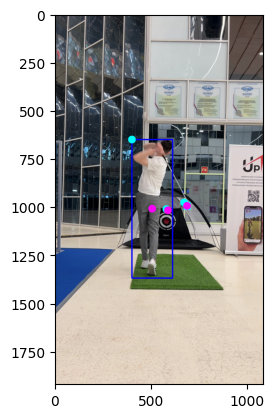

In [ ]:
p = Path("/content/drive/MyDrive/hackathon_swf/dataset/labels/37356e9e-fc6b-40fa-a7f1-398018feee70_frame_63.txt")
ip = Path(f"/content/drive/MyDrive/hackathon_swf/dataset/images/37356e9e-fc6b-40fa-a7f1-398018feee70_frame_63.jpg")

colors = [[255, 0, 0], [0, 255, 0], [255, 255, 0]]

print(p, ip)
img = cv2.imread(str(ip), cv2.IMREAD_UNCHANGED)
height, width = img.shape[:2]

f = open(str(p),"r")
lines = f.readlines()
f.close()

for l in lines:
    spl = l.split(sep=" ")
    spl[1:] = np.array(spl[1:]).astype(np.float32)
    cls = int(spl[0])
    x, y, w, h = spl[1:]
    print(x, y, w, h)
    # break

    # x *= width
    # w *= width

    # y *= height
    # h *= height

    x, y = int(x), int(y)
    w, h = int(w), int(h)
    print(x, y, w, h)
    print(x, y, x+w, y+h)
    img = cv2.rectangle(img, (x, y), (x+w, y+h), color=colors[cls], thickness=5)
    img = cv2.circle(img, (x, y), radius=20, color=(255, 255, 0), thickness=-1 )
    img = cv2.circle(img, (x+w//2, y+h//2), radius=20, color=(255, 0, 255), thickness=-1 )


plt.imshow(img[..., ::-1])

In [ ]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
path = Path("/content/drive/MyDrive/hackathon_swf/dataset/labels/")
img_path = Path(f"/content/drive/MyDrive/hackathon_swf/dataset/images/")

for p, ip in zip(sorted(path.iterdir()), sorted(img_path.iterdir())):
    print(p.stem, ip.stem)
    print(p.stem == ip.stem)

In [ ]:
path = Path("/content/drive/MyDrive/hackathon_swf/dataset/labels/")
img_path = Path(f"/content/drive/MyDrive/hackathon_swf/dataset/images/")

for p, ip in zip(sorted(path.iterdir()), sorted(img_path.iterdir())):
    print(p.stem, ip.stem)
    print(p.stem == ip.stem)

    img = cv2.imread(str(ip), cv2.IMREAD_UNCHANGED)
    height, width = img.shape[:2]
    f = open(str(p),"r")
    lines = f.readlines()
    f.close()
    with open(str(p), "w") as file:
        for l in lines:
            spl = l.split(sep=" ")
            spl[1:] = np.array(spl[1:]).astype(np.float32)
            cls = spl[0]
            x, y, w, h = spl[1:]
            x += w/2
            y += h/2

            x /= width
            w /= width

            y /= height
            h /= height

            file.write(f"{cls} {x:.8f} {y:.8f} {w:.8f} {h:.8f}\n")



In [ ]:
path = Path("/content/drive/MyDrive/hackathon_swf/dataset/labels")

idxs = set(np.random.randint(102, size=25))
idxs_val = np.random.choice(25, 10, replace=False)
idxs_test = list(set(range(25)) - set(idxs_val))

f_train = open("/content/drive/MyDrive/hackathon_swf/dataset/train.txt", "w")
f_val = open("/content/drive/MyDrive/hackathon_swf/dataset/val.txt", "w")
f_test = open("/content/drive/MyDrive/hackathon_swf/dataset/test.txt", "w")

for i, p in enumerate(path.iterdir()):
    n = p.stem
    if i in idxs_val:
        f_val.write(f"/content/drive/MyDrive/hackathon_swf/dataset/images/{n}.jpg\n")
    elif i in idxs_test:
        f_test.write(f"/content/drive/MyDrive/hackathon_swf/dataset/images/{n}.jpg\n")
    else: f_train.write(f"/content/drive/MyDrive/hackathon_swf/dataset/images/{n}.jpg\n")

f_train.close()
f_val.close()
f_test.close()

In [ ]:
model = YOLO("/content/drive/MyDrive/hackathon_swf/yolov8s.pt")
res = model.train(data="/content/drive/MyDrive/hackathon_swf/dataset/dataset.yaml", epochs=300, imgsz=640, device=0)

Ultralytics YOLOv8.0.163 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/hackathon_swf/yolov8s.pt, data=/content/drive/MyDrive/hackathon_swf/dataset/dataset.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes

## onnx

In [ ]:
import torch

In [ ]:
model = YOLO("/content/drive/MyDrive/hackathon_swf/weights/best.pt")

In [ ]:
# Export the model
model.export(format='onnx')

Ultralytics YOLOv8.0.163 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients

PyTorch: starting from '/content/runs/detect/train7/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (21.4 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 66.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.7s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.1 opset 17...
ONNX: export success ✅ 9.6s, saved as '/content/runs/detect/train7/weights/best.onnx' (42.7 MB)

Export complete (12.6s)
Results saved to /content/runs/detect/train7/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train7/weights/best.onnx imgsz=640 
Validate:        yolo val task=det

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



'/content/runs/detect/train7/weights/best.onnx'

In [ ]:
res = model.predict("/content/drive/MyDrive/hackathon_swf/golf.jpg")


image 1/1 /content/drive/MyDrive/hackathon_swf/golf.jpg: 640x640 1 person, 1 ball, 7 golfclubs, 24.7ms
Speed: 10.5ms preprocess, 24.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

### test in onnx

In [ ]:
import onnx
import onnxruntime as ort

onnx_model = onnx.load("/content/drive/MyDrive/hackathon_swf/weights/yolov8s_trained.onnx")
onnx.checker.check_model(onnx_model)

In [ ]:
ort_sess = ort.InferenceSession('/content/drive/MyDrive/hackathon_swf/weights/yolov8s_trained.onnx', providers=['CUDAExecutionProvider'])
model_inputs = ort_sess.get_inputs()

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
image_batch = cv2.imread("/content/drive/MyDrive/hackathon_swf/golf4.jpg", cv2.IMREAD_UNCHANGED)
image_batch = cv2.resize(image_batch, (640, 640))


In [ ]:
img_bt = np.transpose(image_batch[None, ...].astype(np.float32), (0, 3, 1, 2))

In [ ]:
output = ort_sess.run(None, {model_inputs[0].name: img_bt})[0]
output.shape

(1, 7, 8400)

In [ ]:
# Transpose and squeeze the output to match the expected shape
outputs = np.transpose(np.squeeze(output[0]))

# Get the number of rows in the outputs array
rows = outputs.shape[0]

# Lists to store the bounding boxes, scores, and class IDs of the detections
boxes = []
scores = []
class_ids = []

img_height, img_width = image_batch.shape[:2]
input_height, input_width = 640, 640
# Calculate the scaling factors for the bounding box coordinates
x_factor = img_width / input_width
y_factor = img_height / input_height

confidence_thres = 0.995
iou_thres = 0.5
# Iterate over each row in the outputs array
for i in range(rows):
    # Extract the class scores from the current row
    classes_scores = outputs[i][4:]

    # Find the maximum score among the class scores
    max_score = np.amax(classes_scores)

    # If the maximum score is above the confidence threshold
    if max_score >= confidence_thres:

        # Get the class ID with the highest score
        class_id = np.argmax(classes_scores)

        # Extract the bounding box coordinates from the current row
        x, y, w, h = outputs[i][0], outputs[i][1], outputs[i][2], outputs[i][3]

        # Calculate the scaled coordinates of the bounding box
        left = int((x - w / 2) * x_factor)
        top = int((y - h / 2) * y_factor)
        width = int(w * x_factor)
        height = int(h * y_factor)

        # Add the class ID, score, and box coordinates to the respective lists
        class_ids.append(class_id)
        scores.append(max_score)
        boxes.append([left, top, width, height])

        # Apply non-maximum suppression to filter out overlapping bounding boxes
indices = cv2.dnn.NMSBoxes(boxes, scores, confidence_thres, iou_thres)
print(len(indices))


111


In [ ]:
classes = ['person', 'ball', 'golfclub']

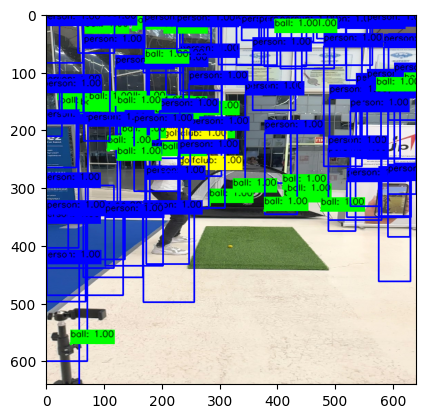

In [ ]:
img_cp = image_batch.copy()
colors = [[255, 0, 0], [0, 255, 0], [0, 255, 255]]
for i in indices:
    left, top, width, height = boxes[i]
    score = scores[i]
    class_id = class_ids[i]
    cv2.rectangle(img_cp, (left, top), (left+width, top+height), color=colors[class_id], thickness=2)

    label = f'{classes[class_id]}: {score:.2f}'
    (label_width, label_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    label_x = left
    label_y = top - 10 if top - 10 > label_height else top + 10
    cv2.rectangle(img_cp, (label_x, label_y - label_height), (label_x + label_width, label_y + label_height), colors[class_id],
                      cv2.FILLED)
    cv2.putText(img_cp, label, (label_x, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)

plt.imshow(img_cp[..., ::-1])

## roboflow

In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="8GCvLKGntoOcuIDOcOul")
project = rf.workspace("fenris-bsfpe").project("golf-batch-7")
dataset = project.version(9).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.163, to fix: `pip install ultralytics==8.0.134`

Extracting Dataset Version Zip to Golf-Batch-7-9 in yolov8:: 100%|██████████| 15141/15141 [00:05<00:00, 2797.13it/s]


In [ ]:
from pathlib import Path

In [ ]:
path = Path("/content/Golf-Batch-7-9/valid/images")

val_subset = np,
counter = 0
for i in path.iterdir():
    counter += 1
counter

2271

In [ ]:
path = Path("/content/Golf-Batch-7-9/valid/images")

idxs = set(np.random.randint(2271, size=400))
idxs_val = np.random.choice(400, 300, replace=False)
idxs_test = list(set(range(400)) - set(idxs_val))

f_train = open("/content/Golf-Batch-7-9/valid/train.txt", "w")
f_val = open("/content/Golf-Batch-7-9/valid/val.txt", "w")
f_test = open("/content/Golf-Batch-7-9/valid/test.txt", "w")

for i, p in enumerate(path.iterdir()):
    n = p.stem
    if i in idxs_val:
        f_val.write(f"/content/Golf-Batch-7-9/valid/images/{n}.jpg\n")
    elif i in idxs_test:
        f_test.write(f"/content/Golf-Batch-7-9/valid/images/{n}.jpg\n")
    else: f_train.write(f"/content/Golf-Batch-7-9/valid/images/{n}.jpg\n")

f_train.close()
f_val.close()
f_test.close()

In [ ]:
model = YOLO("/content/drive/MyDrive/hackathon_swf/yolov8s.pt")
res = model.train(data="/content/Golf-Batch-7-9/data2.yaml", epochs=300, imgsz=640, device=0)

Ultralytics YOLOv8.0.163 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/hackathon_swf/yolov8s.pt, data=/content/Golf-Batch-7-9/data2.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscri